In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Improving a model
First predictions = baseline predictions
First model = baseline model

from a data perspective:
*Could we colect more data ?
*Could we improve our data ?

from a model perspective:
*Is there a better model ?
*Could we improve the current model ? 

Hyperparameters vc parameters 
* Parameters=model find these patterns in data perspective
* Hyperparameters=settings on a model you can adjust to (potentially)improve its ability to find patterns

/**********************************\
Three ways to adjust hyperparameters
1-By hand
2-Randomly with RandomsearchCV
3-Exhaustively with GridSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 1-Tuning hyperparameters by hand
Let's make 3 sets training, validation and test. 

-max_depth
-max_features
-min_samples_leaf
-min_sample_split
-n_estimators

In [3]:
heart_disease=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\VS_CODE\ML\heart-disease-scikit.csv")
np.random.seed(42)

#Shuffle the data
heart_disease_sf=heart_disease.sample(frac=1)  

# Split into X and y
X=heart_disease_sf.drop("target",axis=1)
y=heart_disease_sf["target"]

# Split into train val test
train_split=round(0.7*len(heart_disease_sf))
valid_split=round(train_split+0.15*len(heart_disease_sf))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [4]:
np.random.seed(42)
clf.fit(X_train,y_train)
# Make the baseline predictions
y_preds=clf.predict(X_valid)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds (y_true, y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)

    print(f"Accuracy  : % {accuracy*100:.2f}")
    print(f"Precision  : {precision*100:.2f}")
    print(f"Recall  :  {recall:.2f}")
    print(f"F1_score  :  {f1:.2f}")
    metric_dict={"accuracy":round(accuracy,2),"precision":round(precision,2),
    "recall":round(recall,2),"f1":round(f1,2)}
    return metric_dict
#Evaluate the classifier on valid set
baseline_metrics=evaluate_preds(y_valid,y_preds)

Accuracy  : % 82.22
Precision  : 84.00
Recall  :  0.84
F1_score  :  0.84


In [5]:
np.random.seed(42)
## Create a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=2000)
clf_2.fit(X_train,y_train)

# Make preds with different hyperparameters
y_preds_2=clf_2.predict(X_valid)

#Eval
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Accuracy  : % 82.22
Precision  : 81.48
Recall  :  0.88
F1_score  :  0.85


In [6]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
## Create a second classifier with different hyperparameters
clf_3=RandomForestClassifier(n_estimators=2000,max_depth=10)
clf_3.fit(X_train,y_train)

# Make preds with different hyperparameters
y_preds_3=clf_3.predict(X_valid)

#Eval
clf_3_metrics=evaluate_preds(y_valid,y_preds_3)

Accuracy  : % 82.22
Precision  : 81.48
Recall  :  0.88
F1_score  :  0.85


# Hyperparameter tuning with RandomizedSearchCV

In [7]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,2000],
"max_depth": [None,5,10,20,30],
"max_features": ["auto","sqrt"],
"min_samples_split": [2,4,6],
"min_samples_leaf":[1,2,4]}
np.random.seed(42)

X=heart_disease_sf.drop("target",axis=1)
y=heart_disease_sf["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate clf
clf=RandomForestClassifier(n_jobs=1)
clf.fit(X_train,y_train)
#Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                param_distributions=grid,
                n_iter=10,
                cv=5,
                verbose=2)

#Randomized RandomizedSearchCV makes automatically makes validation set
rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 2000]},
                   verbose=2)

In [8]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [9]:
# Make preds with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy  : % 83.61
Precision  : 78.12
Recall  :  0.89
F1_score  :  0.83


# Hyperparameter tuning with GridSearchCV

In [10]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [11]:
# we are reorganise params by looking at the rs_clf best params
grid_2={'n_estimators': [500, 1000, 2000],
 'max_depth': [ 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [4, 6],
 'min_samples_leaf': [4]}

In [12]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

X=heart_disease_sf.drop("target",axis=1)
y=heart_disease_sf["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instantiate clf
clf=RandomForestClassifier(n_jobs=1)
clf.fit(X_train,y_train)
#Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                param_grid=grid_2,
                cv=5,
                verbose=2)

# GridSearchCV makes automatically makes validation set
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [4, 6],
                         'n_estimators': [500, 1000, 2000]},
             verbose=2)

In [13]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 500}

In [14]:
gs_clf_y_preds=gs_clf.predict(X_test)

gs_metrics=evaluate_preds(y_test,gs_clf_y_preds)

Accuracy  : % 85.25
Precision  : 78.79
Recall  :  0.93
F1_score  :  0.85


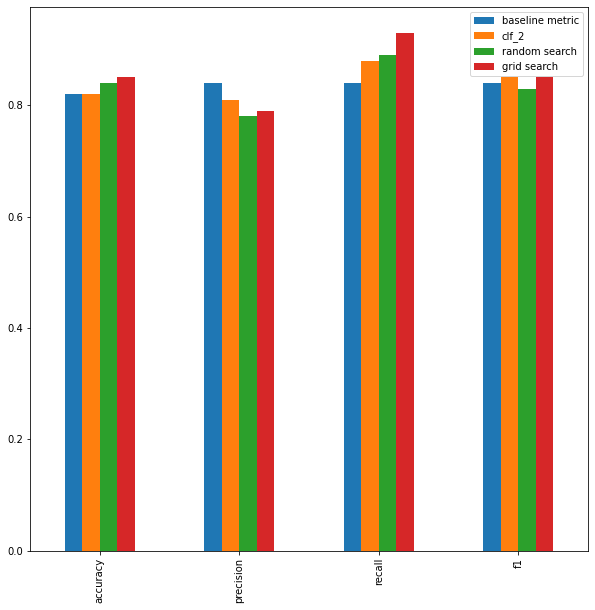

In [15]:
compare_metrics=pd.DataFrame({"baseline metric":baseline_metrics,"clf_2":clf_2_metrics,
"random search":rs_metrics,
"grid search":gs_metrics })
compare_metrics.plot.bar(figsize=(10,10));

## Saving and loading trained ML models
* 2 ways to save and load ML models: 
1-With python's pickle models
2-With the joblib module

In [16]:
# ----Pickle----
import pickle
pickle.dump(gs_clf,open("gs_random_model_1.pkl","wb"))

In [17]:
# load a saved model
loaded_pickle_model=pickle.load(open("gs_random_model_1.pkl","rb"))

In [18]:
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy  : % 85.25
Precision  : 78.79
Recall  :  0.93
F1_score  :  0.85


{'accuracy': 0.85, 'precision': 0.79, 'recall': 0.93, 'f1': 0.85}

In [19]:
# ----joblib----
from joblib import dump,load
dump(gs_clf,filename="gs_random_model_2.joblib")

['gs_random_model_2.joblib']

In [20]:
loaded_joblib_model=load(filename="gs_random_model_2.joblib")
joblib_y_preds=loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Accuracy  : % 85.25
Precision  : 78.79
Recall  :  0.93
F1_score  :  0.85


{'accuracy': 0.85, 'precision': 0.79, 'recall': 0.93, 'f1': 0.85}

## 7-Putting it all together

In [21]:
data=pd.read_csv(r"C:\Users\murat\OneDrive\Masaüstü\VS_CODE\ML\car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [22]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
# Fill missing data
# Convert data to numbers
# Build a model on the data

# Getting data ready 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

np.random.seed(42)

# Import data and drop missing values
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer Pipeline
categorical_features =["Make","Colour"]
categorical_transformer=Pipeline(steps=[
("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature =["Doors"]
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4),)])

numeric_features =["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

# Setup preprocessing fill missing values then convert to numbers
preprocessor=ColumnTransformer(transformers=[("cat",categorical_transformer,categorical_features),
("door",door_transformer,door_feature),
("num",numeric_transformer,numeric_features)
 ])

# Creating a preprocessing and modelling Pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
("model",RandomForestRegressor())])

X=data.drop("Price",axis=1)
y=data["Price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)


0.22188417408787875

It is possible to use GridSearchCV or RandomizedSearchCV with our Pipeline

In [27]:
# GridSearchCV
pipe_grid={
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split":[2,4]
}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [28]:
gs_model.score(X_test,y_test)

0.3339554263158365